## Урок 8

### Снижение размерности данных

#### 1. Можно ли отобрать наиболее значимые признаки с помощью PCA?

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_auc_score, roc_curve, auc)
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

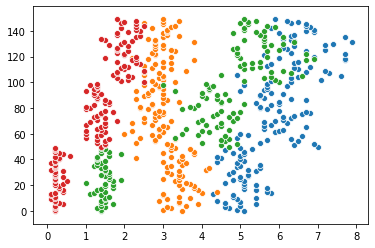

In [3]:
for ii in X.T:
    sns.scatterplot(ii, range(len(ii)))

In [4]:
# from sklearn.datasets import load_breast_cancer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score
# X1, y1 = load_breast_cancer(return_X_y=True)

# for num in range(len(data.columns.tolist())):
#     auc_ = roc_auc_score(
#         y_true = y1,
#         y_score = X1[:, num]
# #         average='weighted',
# #         multi_class='ovr'
#     )
#     gini = np.abs(2*auc_ - 1)
#     print(gini)

In [5]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по строке
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

In [6]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
437.77467247979905
137.1045707202104
22.01353133569722
3.1072254642928634


In [7]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[72.96244541329992, 22.850761786701757, 3.6689218892828737, 0.5178709107154778]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [8]:
eig_pairs[0][1]

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [9]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [10]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)
Z.shape

(150, 2)

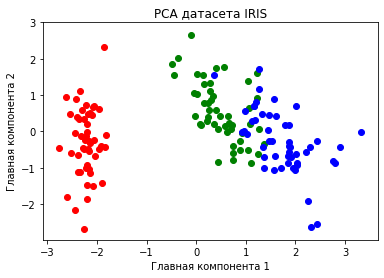

In [11]:
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

С помощью РСА можно отобрать наиболее значимые признаки, из 4 признаков было отобрано 2.

#### (*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [12]:
import numpy as np
U, s, W1 = np.linalg.svd(X_)

In [13]:
-np.sort(-s)

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [14]:
W1

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [15]:
W1 = np.hstack((W1[0].reshape(4,1), W1[1].reshape(4,1)))
W1

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [16]:
Z1 = X_.dot(W1)
Z1.shape

(150, 2)

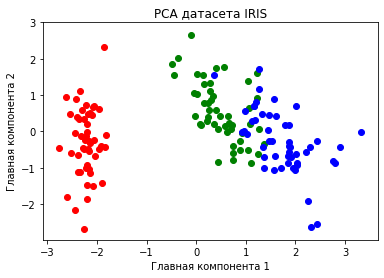

In [17]:
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z1[y==i, 0], Z1[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

####  (*) Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(solver="liblinear", random_state=99).fit(X, y)
clf_num = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

In [19]:
clf2 = LogisticRegression(solver="liblinear", random_state=99).fit(Z1, y)
clf_num2 = roc_auc_score(y, clf2.predict_proba(Z1), multi_class='ovr')

In [20]:
# Посмотрим на отложенной выборке
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=99)

In [21]:
clf3 = LogisticRegression(solver="liblinear", random_state=99).fit(X_train, y_train)
clf_num3 = roc_auc_score(y_test, clf3.predict_proba(X_test), multi_class='ovr')

In [22]:
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(Z1, y, test_size=0.4, random_state=99)

In [23]:
clf4 = LogisticRegression(solver="liblinear", random_state=99).fit(X_train2, y_train2)
clf_num4 = roc_auc_score(y_test2, clf4.predict_proba(X_test2), multi_class='ovr')

In [24]:
clf_num, clf_num2, clf_num3, clf_num4

(0.9913333333333334,
 0.9616000000000001,
 0.9826810616284302,
 0.9561583640531008)

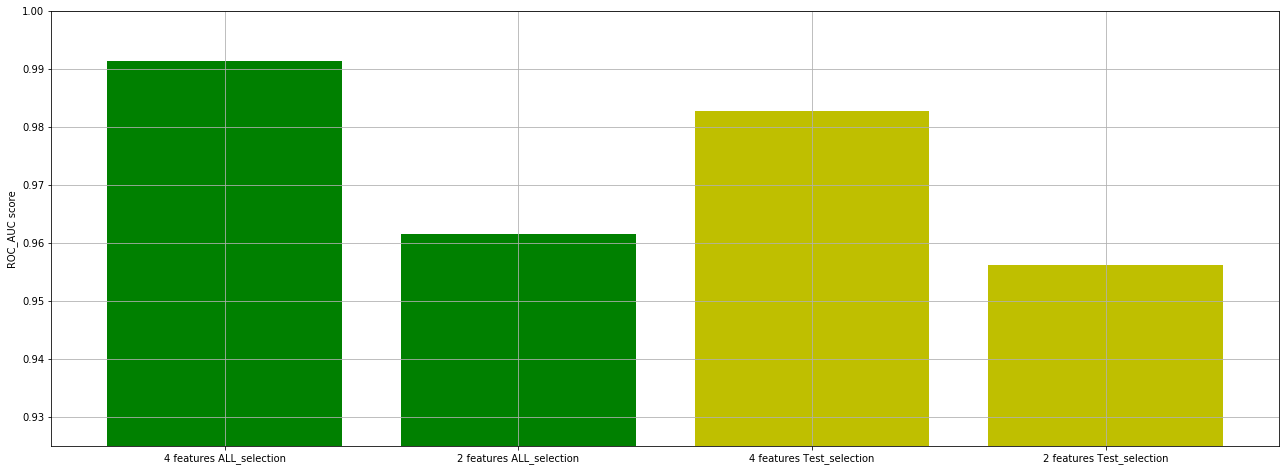

In [25]:
plt.figure(figsize=(22, 8))
plt.bar(range(4), [clf_num, clf_num2, clf_num3, clf_num4], tick_label=['4 features ALL_selection','2 features ALL_selection',
                              '4 features Test_selection', '2 features Test_selection'], color=['g','g','y','y'])
plt.ylim(0.925, 1)
plt.ylabel('ROC_AUC score')
plt.grid()

На тестовой выборке соотношение качества примерно такое же, как и соотношение на всей выборке.